In [35]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [66]:
import numpy as np

pi = 3.14159
kb = 1.38065e-23
h = 6.62607e-34
me = 9.109e-31
Na = 6.022e23
ec = 1.6e-19
level = 127109.842
T = np.arange(400, 40001, 400)  # Avoiding T=0 to prevent division by zero and logarithm of zero

lnqA = np.zeros_like(T, dtype=np.float64)
qA = np.zeros_like(T, dtype=np.float64)

for i in range(len(T)):
    lnqA[i] = 1.5 * np.log((2 * pi * kb * 0.039948) / (Na * h ** 2)) + 1.5 * np.log(T[i]) 
    qA[i] = np.exp(lnqA[i])
    
for i in range(len(T)):
    lnqI = 1.5 * np.log((2 * pi * kb * 0.039947) / (Na * h ** 2)) + 1.5 * np.log(T) + 4 
    qI =   np.exp(lnqI)
# qI =  np.exp(lnqI)

for i in range(len(T)):
    lnqe = 1.5 * np.log((2 * pi * kb * me) / (h ** 2)) + 1.5 * np.log(T)
    qe = 2 * np.exp(lnqe)

rat = np.zeros_like(T, dtype=np.float64)
nI = np.zeros_like(T, dtype=np.float64)
nA = np.zeros_like(T, dtype=np.float64)
ec = 1.6e-19

for i in range(len(T)):
    rat[i] = 2*((qI[i] * qe[i]) / qA[i]) * np.exp(-157.724 * ec / (T[i] * kb))
    D = np.sqrt((4*101325) / (kb * T[i] * rat[i]))
    nI[i] = D * rat[i] / 2
    nA[i] = (nI[i] ** 2) / rat[i]

print("s.No           Temperature (K)       Ar                             Ar+")
for index, (temp, nA_val, nI_val) in enumerate(zip(T, nA, nI), start=1):
    print("{:<15} {:<20} {:<30} {:<30}".format(index, temp, nA_val, nI_val))


s.No           Temperature (K)       Ar                             Ar+
1               400                  nan                            nan                           
2               800                  nan                            nan                           
3               1200                 nan                            nan                           
4               1600                 nan                            nan                           
5               2000                 nan                            nan                           
6               2400                 nan                            nan                           
7               2800                 2.621048057074566e+24          8.002447071653636e-116        
8               3200                 2.2934170499402453e+24         4.332834379332314e-98         
9               3600                 2.038592933280218e+24          2.698016225204708e-84         
10              4000                 

/tmp/ipykernel_33/1289531699.py:35: RuntimeWarning: divide by zero encountered in scalar divide
  D = np.sqrt((4*101325) / (kb * T[i] * rat[i]))
/tmp/ipykernel_33/1289531699.py:36: RuntimeWarning: invalid value encountered in scalar multiply
  nI[i] = D * rat[i] / 2


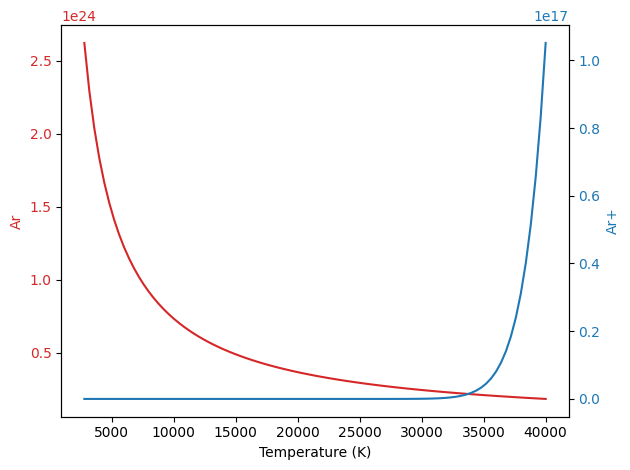

In [67]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Temperature (K)')
ax1.set_ylabel('Ar', color=color)
ax1.plot(T, nA, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Ar+', color=color)
ax2.plot(T, nI, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.show()

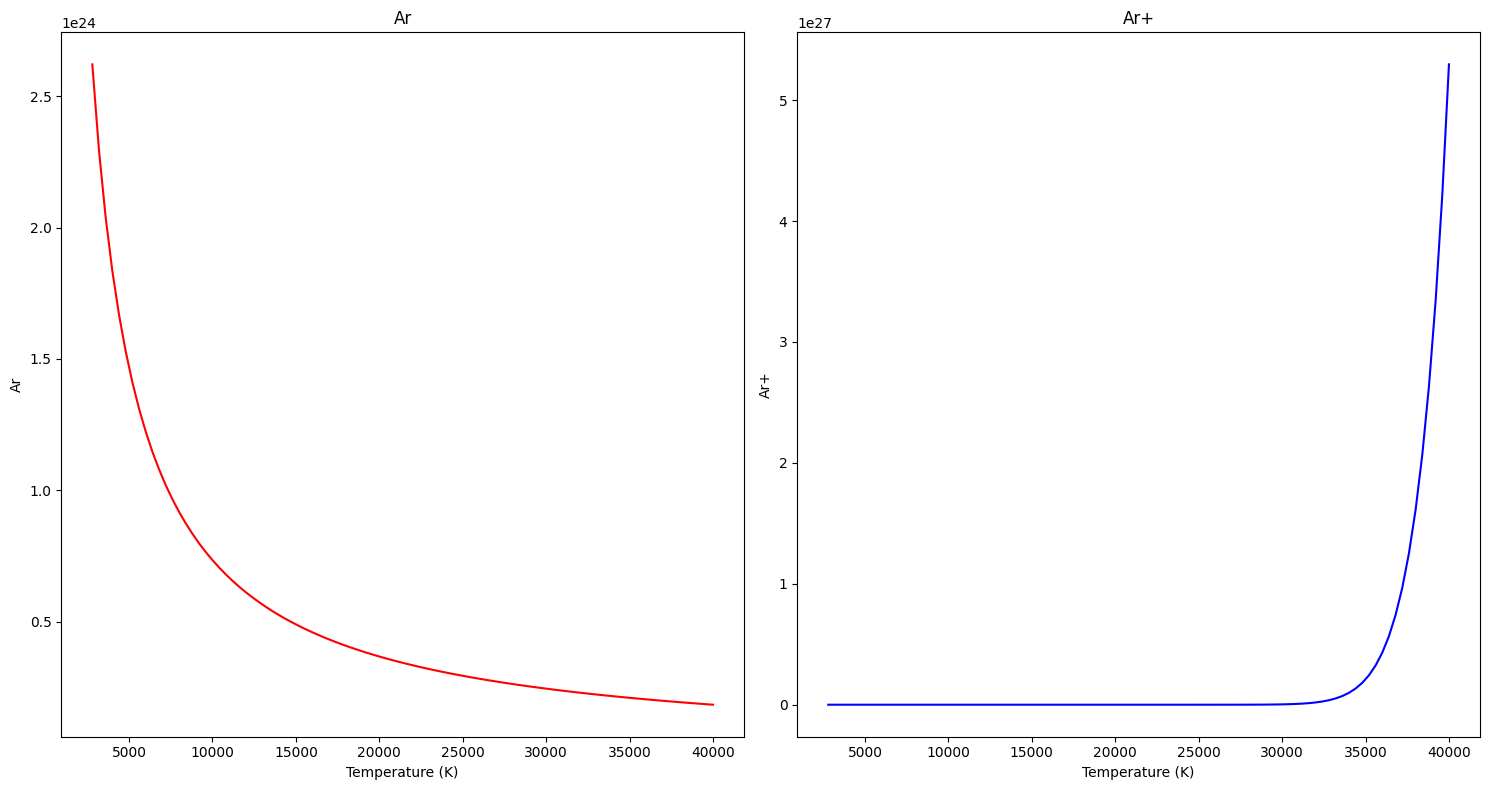

In [45]:
plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
plt.plot(T, nA, 'r')
plt.xlabel('Temperature (K)')
plt.ylabel('Ar')
plt.title('Ar')

plt.subplot(1, 2, 2)
plt.plot(T, nI, 'b')
plt.xlabel('Temperature (K)')
plt.ylabel('Ar+')
plt.title('Ar+')

plt.tight_layout()
plt.show()